<a href="https://www.kaggle.com/code/leon29/michelin-gr-2021-full-eda?scriptVersionId=96166252" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<!-- <a href="https://media.suckhoecong.vn/Images/Uploaded/Share/2016/05/11/michelin_star.png">Image</a> -->

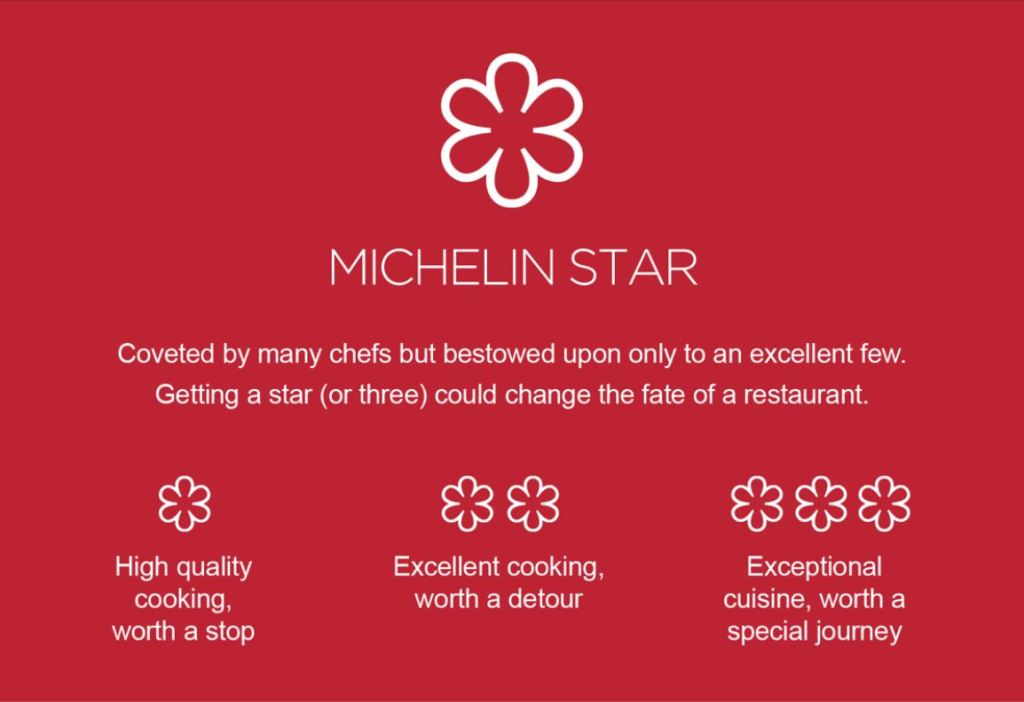

# Instruction:
### Overview of Michelin:
**The Michelin stars** are the ultimate hallmark of culinary excellence. Its story coincides with the invention of the automobile. The first Michelin star was given in 1926 in the first Michelin Guide founded by the brothers Andre Michelin and Edouard Michelin, the founders of Michelin automobile. Later, in 1931, the rating was expanded to three stars and continues till now. Besides the star rating, Michelin came up with the "Bib Gourmand" title for those restaurants serving high-quality fare at a moderate price.

***Michelin Guide Star Rating Descriptions***
* 1 Star: A very good restaurant in its category.
* 2 Stars: Excellent cooking, worth a detour.
* 3 Stars: Exceptional cuisine, worth a special journey.

### Objectives:
- What is the most Michelin rank existed?
- What is the highest/lowest price?
- Which country does it have most/lest Michelin restaurants?
- What is the most beloved cuisine style? (based on Michelin rank)

# First Setup

### Setup Library - Config - Import data

In [1]:
# Setup Library
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import re

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default= "notebook_connected"

import folium

In [2]:
# Config
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style="darkgrid")

In [3]:
# Functions
def lst_unique(list1,srt = False):
    list_set = set(list1)
    unique_list = (list(list_set))
    if srt:
        unique_list.sort()
    return unique_list

def infoOut(data,details=False,vunique=False,srt=False):
    dfInfo = data.columns.to_frame(name='Column')
    dfInfo['Non-Null Count'] = data.notna().sum()
    # dfInfo['Is-Null Count'] = data.isnull().sum()
    dfInfo['Dtype'] = data.dtypes
    dfInfo.reset_index(drop=True,inplace=True)
    if vunique:
        dfInfo['Unique'] = np.nan
        Unique_col = dfInfo.columns.get_loc('Unique')
        for i in range(0,len(data.columns)):
            Va_unique = lst_unique(data.T.values[i],srt)
            Va_listToStr = ';'.join([str(elem) for elem in Va_unique])
            dfInfo.iloc[i,Unique_col] = Va_listToStr
    if details:
        rangeIndex = (dfInfo['Non-Null Count'].min(),dfInfo['Non-Null Count'].min())
        totalColumns = dfInfo['Column'].count()
        dtypesCount = dfInfo['Dtype'].value_counts()
        totalMemory = dfInfo.memory_usage().sum()
        return dfInfo, rangeIndex, totalColumns, dtypesCount, totalMemory
    else:
        return dfInfo

def count_sum(data ,column: str, plot = "Pie"):
    by_column = data\
                .groupby(column)\
                .agg({"Transaction Type": "count", "Amount": "sum"})\
                .rename(columns={"Transaction Type": "Total"})\
                .reset_index()
    by_column.columns = [column, "Total", "Sum"]
    
    labels = by_column[column]

    fig = None
    
    if plot == 'Pie':
        fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Sum', 'Total'])
        fig.add_trace(
            go.Pie(
                labels=labels,
                values=by_column["Sum"],
                name="Sum"
            ),
        1, 1)
        fig.add_trace(
            go.Pie(
                labels=labels,
                values=by_column["Total"],
                name="Total"
            ),
        1, 2)
    elif plot == 'Scatter':
        fig = make_subplots(1, 2,
                    subplot_titles=['Sum', 'Total'])
        fig.add_trace(
            go.Scatter(
                x=labels,
                y=by_column["Sum"],
                name="Sum"
            ),
        1, 1)
        fig.add_trace(
            go.Scatter(
                x=labels,
                y=by_column["Total"],
                name="Total"
            ),
        1, 2)
        

    fig.update_layout(title_text=f"{column} Analysis")
    fig.show()
    
    return by_column



In [4]:
# Import Data
df = pd.read_csv('../input/michelin-guide-restaurants-2021/michelin_my_maps.csv')

### Data first look

In [5]:
print('Data Overview:-----------------------------------------')
display(df.head(5))
print('Data Structure:-----------------------------------------')
display(infoOut(df,vunique=True))

Data Overview:-----------------------------------------


,Name,Address,Location,MinPrice,MaxPrice,Currency,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award
0,Aqua,"Parkstraße 1, Wolfsburg, 38440, Germany",Wolfsburg,225,225,EUR,"Creative, Modern Cuisine",10.79,52.43,495361606056.00,https://guide.michelin.com/en/niedersachsen/wo...,http://www.restaurant-aqua.com,3 MICHELIN Stars
1,The Table Kevin Fehling,"Shanghaiallee 15, Hamburg, 20457, Germany",Hamburg,230,230,EUR,Creative,10.00,53.54,494022867422.00,https://guide.michelin.com/en/hamburg-region/h...,http://www.the-table-hamburg.de/,3 MICHELIN Stars
2,Restaurant Überfahrt Christian Jürgens,"Überfahrtstraße 10, Rottach-Egern, 83700, Germany",Rottach-Egern,259,319,EUR,Creative,11.76,47.70,4980226690.00,https://guide.michelin.com/en/bayern/rottach-e...,http://www.althoffcollection.com,3 MICHELIN Stars
3,Victor's Fine Dining by christian bau,"Schlossstraße 27, Perl, 66706, Germany",Perl,205,295,EUR,Creative,6.39,49.54,49686679118.00,https://guide.michelin.com/en/saarland/perl/re...,https://www.victors-fine-dining.de/,3 MICHELIN Stars
4,Rutz,"Chausseestraße 8, Berlin, 10115, Germany",Berlin,198,245,EUR,"Modern Cuisine, Creative",13.39,52.53,493024628760.00,https://guide.michelin.com/en/berlin-region/be...,https://www.rutz-restaurant.de/,3 MICHELIN Stars


Data Structure:-----------------------------------------


,Column,Non-Null Count,Dtype,Unique
0,Name,6502,object,Dolada;La Bécasse;Gasthof zum Bad;Kürbishof;Il...
1,Address,6502,object,"riva Antonio Caccia 7, Lugano, 6900, Switzerla..."
2,Location,6502,object,Pont-Sainte-Marie;Cormons;Gaiole in Chianti;Ca...
3,MinPrice,6501,object,"nan;47;788;121;148;1,688;42,000;2,900;37,000;3..."
4,MaxPrice,6501,object,"260,000;nan;47;121;148;1,688;42,000;54,000;2,9..."
5,Currency,6501,object,HUF;nan;ISK;HKD;CZK;BRL;RSD;CNY;MOP;KRW;EUR;TW...
6,Cuisine,6502,object,"Creative, Italian Contemporary;Spanish;Zhejian..."
7,Longitude,6502,float64,-0.57423;1.7724975;2.3008612;2.8876408;4.90031...
8,Latitude,6502,float64,1.283175;7.8810304;7.9801073;8.5936703;8.27692...
9,PhoneNumber,6381,float64,nan;nan;nan;nan;nan;nan;nan;4947214340.0;nan;n...


### Null-data Solution & Reconfig:

In [6]:
# Null-data explore:
print('Percentage of null: ----------------------------------')
null_per = df.isnull().sum()*100/len(df)
null_per = null_per.to_frame()
null_per.columns = ['Percent']
null_per.index.names = ['Name']
null_per.reset_index(inplace=True)
display(null_per)

Percentage of null: ----------------------------------


,Name,Percent
0,Name,0.00
1,Address,0.00
2,Location,0.00
3,MinPrice,0.02
4,MaxPrice,0.02
5,Currency,0.02
6,Cuisine,0.00
7,Longitude,0.00
8,Latitude,0.00
9,PhoneNumber,1.86


In [7]:
# Drop Null-data and Reconfig format
df = df.dropna(subset=['MinPrice','MaxPrice','Currency']).reset_index().drop(columns='index')
df['MinPrice'] = df['MinPrice'].str.replace(',','')
df['MinPrice'] = df['MinPrice'].astype(str).astype('float64')
df['MaxPrice'] = df['MaxPrice'].str.replace(',','')
df['MaxPrice'] = df['MaxPrice'].astype(str).astype('float64')

### Null solved data

In [8]:
print('Overview: ===============================')
display(df.head(3))
print('Summary: ===============================')
df_summary = infoOut(df,vunique=True)
display(df_summary)

Overview: ===============================


,Name,Address,Location,MinPrice,MaxPrice,Currency,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award
0,Aqua,"Parkstraße 1, Wolfsburg, 38440, Germany",Wolfsburg,225.00,225.00,EUR,"Creative, Modern Cuisine",10.79,52.43,495361606056.00,https://guide.michelin.com/en/niedersachsen/wo...,http://www.restaurant-aqua.com,3 MICHELIN Stars
1,The Table Kevin Fehling,"Shanghaiallee 15, Hamburg, 20457, Germany",Hamburg,230.00,230.00,EUR,Creative,10.00,53.54,494022867422.00,https://guide.michelin.com/en/hamburg-region/h...,http://www.the-table-hamburg.de/,3 MICHELIN Stars
2,Restaurant Überfahrt Christian Jürgens,"Überfahrtstraße 10, Rottach-Egern, 83700, Germany",Rottach-Egern,259.00,319.00,EUR,Creative,11.76,47.70,4980226690.00,https://guide.michelin.com/en/bayern/rottach-e...,http://www.althoffcollection.com,3 MICHELIN Stars


Summary: ===============================


,Column,Non-Null Count,Dtype,Unique
0,Name,6501,object,Dolada;La Bécasse;Gasthof zum Bad;Kürbishof;Il...
1,Address,6501,object,"riva Antonio Caccia 7, Lugano, 6900, Switzerla..."
2,Location,6501,object,Pont-Sainte-Marie;Cormons;Gaiole in Chianti;Ca...
3,MinPrice,6501,float64,2.0;3.0;4.0;5.0;6.0;7.0;8.0;10.0;11.0;12.0;13....
4,MaxPrice,6501,float64,2.0;4.0;5.0;6.0;7.0;8200.0;8.0;10.0;11.0;12.0;...
5,Currency,6501,object,HUF;ISK;HKD;CZK;BRL;RSD;CNY;MOP;KRW;EUR;TWD;SE...
6,Cuisine,6501,object,"Creative, Italian Contemporary;Spanish;Zhejian..."
7,Longitude,6501,float64,-0.57423;1.7724975;2.3008612;2.8876408;4.90031...
8,Latitude,6501,float64,1.283175;7.8810304;7.9801073;8.5936703;8.27692...
9,PhoneNumber,6380,float64,nan;nan;nan;nan;nan;nan;nan;4947214340.0;nan;n...


### Get currency to exchange


In [9]:
# Tempt exchange dict
Curr_ex_dict = {
       "EUR_USD": 1.0576,
       "GBP_USD": 1.2462,
       "MOP_USD": 0.1237,
       "HKD_USD": 0.1274,
       "JPY_USD": 0.0078,
       "KRW_USD": 0.0008,
       "CNY_USD": 0.1489,
       "USD_USD": 1,
       "SEK_USD": 0.1007,
       "NOK_USD": 0.1031,
       "DKK_USD": 0.1421,
       "SGD_USD": 0.7244,
       "TWD_USD": 0.0337,
       "CHF_USD": 1.0283,
       "THB_USD": 0.0290,
       "BRL_USD": 0.2031,
       "CZK_USD": 0.0428,
       "ISK_USD": 0.0076,
       "HRK_USD": 0.1403,
       "HUF_USD": 0.0028,
       "PLN_USD": 0.2275,
       "RSD_USD": 0.0090
}

# Process

### Create new data

In [10]:
# First data
db = df.iloc[:,:]
da = db['Address']

# New data-field: Nation
db['Nation'] = [re.findall(r", \w(?:[A-Za-z])+", da)[-1].replace(', ','') for da in da]

# New data-field: CtUSD (Currency to USD)
db['CtUSD'] = db['Currency']+'_USD'

# New data-field: MinPrice_USD & MaxPrice_USD
db['MinPrice_USD'] = [db['MinPrice'][i]*Curr_ex_dict.get(db['CtUSD'][i]) for i in range(len(db))]
db['MaxPrice_USD'] = [db['MaxPrice'][i]*Curr_ex_dict.get(db['CtUSD'][i]) for i in range(len(db))]

# Split Cuisine-field
db['Cuisine'] = [db['Cuisine'][i].split(', ') for i in range(len(db))]

# Filter&Sort data
cols = ['Name','Location', 'Nation', 'MinPrice_USD', 'MaxPrice_USD','Cuisine', 'Longitude', 'Latitude', 'Award']
db = db.loc[:,cols]

### Summary based on Nation

In [11]:
# Based on Nations (no ranking)
by_Nation = db\
            .groupby('Nation')\
            .agg({"Name":"count","MinPrice_USD":"min","MaxPrice_USD":"max","Longitude":"mean","Latitude":"mean"})\
            .reset_index()
by_Nation.columns = ['Nations','Count','MinP','MaxP','Long','Lat']

# Based on Nations (with ranking)
by_Nation_rank_3 = db[db['Award'] == '3 MICHELIN Stars']\
            .groupby('Nation')\
            .agg({"Name":"count","MinPrice_USD":"min","MaxPrice_USD":"max","Longitude":"mean","Latitude":"mean"})\
            .reset_index()
by_Nation_rank_3.columns = ['Nations','Count','MinP','MaxP','Long','Lat']

by_Nation_rank_2 = db[db['Award'] == '2 MICHELIN Stars']\
            .groupby('Nation')\
            .agg({"Name":"count","MinPrice_USD":"min","MaxPrice_USD":"max","Longitude":"mean","Latitude":"mean"})\
            .reset_index()
by_Nation_rank_2.columns = ['Nations','Count','MinP','MaxP','Long','Lat']

by_Nation_rank_1 = db[db['Award'] == '1 MICHELIN Star']\
            .groupby('Nation')\
            .agg({"Name":"count","MinPrice_USD":"min","MaxPrice_USD":"max","Longitude":"mean","Latitude":"mean"})\
            .reset_index()
by_Nation_rank_1.columns = ['Nations','Count','MinP','MaxP','Long','Lat']

by_Nation_rank_0 = db[db['Award'] == 'Bib Gourmand']\
            .groupby('Nation')\
            .agg({"Name":"count","MinPrice_USD":"min","MaxPrice_USD":"max","Longitude":"mean","Latitude":"mean"})\
            .reset_index()
by_Nation_rank_0.columns = ['Nations','Count','MinP','MaxP','Long','Lat']

### Summary based on Award

In [12]:
cols = ['Award','MinPrice_USD','MaxPrice_USD']

Award_count = db\
            .groupby('Award')\
            .agg({"Name":'count'})\
            .reset_index()
Award_count.columns = ['Award','count']            
          
Award_db = db[cols]
Award_db = pd.melt(Award_db, id_vars =['Award'], value_vars =['MinPrice_USD','MaxPrice_USD'])

In [13]:
da = db.loc[:,['Nation','Award']]
the_dict = dict()

for i in range(len(da)):
    value = da['Nation'][i]
    Award = da['Award'][i]
    if value in the_dict:
        the_dict[value]["count"] = the_dict[value]["count"] +1
        the_dict[value][Award] = the_dict[value][Award] +1
    else:
        the_dict[value] = {"count": 1,"3 MICHELIN Stars": 0,"2 MICHELIN Stars": 0,"1 MICHELIN Star": 0,"Bib Gourmand": 0}
        the_dict[value][Award] = the_dict[value][Award] +1

Nation_Award_db = pd.DataFrame.from_dict(the_dict,orient='index').reset_index()
Nation_Award_db.columns = ['Unique','Total_restaurant','3 MICHELIN Stars','2 MICHELIN Stars','1 MICHELIN Star','Bib Gourmand']

Nation_Award_db['Total_Michelin_restaurant'] = Nation_Award_db['3 MICHELIN Stars'] + Nation_Award_db['2 MICHELIN Stars'] + Nation_Award_db['1 MICHELIN Star']
Nation_Award_db['Total_Stars'] = Nation_Award_db['3 MICHELIN Stars']*3 + Nation_Award_db['2 MICHELIN Stars']*2 + Nation_Award_db['1 MICHELIN Star']
Nation_Award_db = Nation_Award_db.iloc[:,[0,1,6,7]]

Nation_Award_db_topstars = Nation_Award_db.sort_values('Total_Stars',ascending=False).reset_index().drop('index',axis = 1)
Nation_Award_db_topstars.loc['Total'] = Nation_Award_db_topstars.iloc[5:,1:].sum()
Nation_Award_db_topstars.loc['Total','Unique'] = 'Others'
Nation_Award_db_topstars = Nation_Award_db_topstars.drop(Nation_Award_db_topstars.index[5:36])
display(Nation_Award_db_topstars)

Nation_Award_db_botstars = Nation_Award_db.sort_values('Total_Stars',ascending=True).reset_index().head(5).drop('index',axis = 1)


,Unique,Total_restaurant,Total_Michelin_restaurant,Total_Stars
0,France,1119.00,618.00,749.00
1,Japan,843.00,406.00,519.00
2,United,842.00,374.00,470.00
3,Italy,628.00,375.00,435.00
4,Germany,623.00,326.00,390.00
Total,Others,2446.00,1116.00,1393.00


### Summary based on Price

In [14]:
cols = ['Name','Award','MinPrice_USD','MaxPrice_USD','Longitude','Latitude']

Price_db = db[cols]
Top_Min_Price_db = Price_db.sort_values('MinPrice_USD',ascending=True).head(10)
Top_Max_Price_db = Price_db.sort_values('MaxPrice_USD',ascending=False).head(10)

### Summary based on Cuisine

In [15]:
da = db.loc[:,['Cuisine','Award']]
the_dict = dict()

for i in range(len(da)):
    count = da['Cuisine'][i]
    Award = da['Award'][i]
    for index,value in enumerate(count):
        if value in the_dict:
            the_dict[value]["count"] = the_dict[value]["count"] +1
            the_dict[value][Award] = the_dict[value][Award] +1
        else:
            the_dict[value] = {"count": 1,"3 MICHELIN Stars": 0,"2 MICHELIN Stars": 0,"1 MICHELIN Star": 0,"Bib Gourmand": 0}
            the_dict[value][Award] = the_dict[value][Award] +1

Cuisine_db = pd.DataFrame.from_dict(the_dict,orient='index').reset_index()
Cuisine_db.columns = ['Unique','count','3 MICHELIN Stars','2 MICHELIN Stars','1 MICHELIN Star','Bib Gourmand']

Cuisine_db_topcount = Cuisine_db.sort_values('count',ascending=False).head(5).reset_index().drop('index',axis = 1)
Cuisine_db_toprank_3 = Cuisine_db.sort_values('3 MICHELIN Stars',ascending=False).head(5).reset_index().drop('index',axis = 1)
Cuisine_db_toprank_2 = Cuisine_db.sort_values('2 MICHELIN Stars',ascending=False).head(5).reset_index().drop('index',axis = 1)
Cuisine_db_toprank_1 = Cuisine_db.sort_values('1 MICHELIN Star',ascending=False).head(5).reset_index().drop('index',axis = 1)
Cuisine_db_toprank_0 = Cuisine_db.sort_values('Bib Gourmand',ascending=False).head(5).reset_index().drop('index',axis = 1)

# Conclusion:

In [16]:
# Distribution without ranking:
def distributionWOrank():
    # Make an empty map
    m_Nations = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

    # add marker one by one on the map
    data= by_Nation.iloc[:,:]

    for i in range(0,len(data)):
        folium.Circle(
            location=[data.iloc[i]['Lat'], data.iloc[i]['Long']],
            popup=data.iloc[i]['Nations'],
            radius=float(data.iloc[i]['Count'])*200,
            color='crimson',
            fill=True,
            fill_color='crimson'
        ).add_to(m_Nations)

    # Show the map again
    return m_Nations
    
# ----------------------------------------------------------------
def distributionWIrank():
   # Make an empty map
   m_Nations = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

   # add marker one by one on the map
   data_3= by_Nation_rank_3.iloc[:,:]
   data_2= by_Nation_rank_2.iloc[:,:]
   data_1= by_Nation_rank_1.iloc[:,:]
   data_0= by_Nation_rank_0.iloc[:,:]

   for i in range(0,len(data_3)):
      folium.Circle(
         location=[data_3.iloc[i]['Lat'], data_3.iloc[i]['Long']],
         popup=data_3.iloc[i]['Nations'],
         radius=float(data_3.iloc[i]['Count'])*400,
         color='crimson',
         fill=True,
         fill_color='crimson'
      ).add_to(m_Nations)

   for i in range(0,len(data_2)):
      folium.Circle(
         location=[data_2.iloc[i]['Lat'], data_2.iloc[i]['Long']],
         popup=data_2.iloc[i]['Nations'],
         radius=float(data_2.iloc[i]['Count'])*400,
         color='azure',
         fill=True,
         fill_color='azure'
      ).add_to(m_Nations)

   for i in range(0,len(data_1)):
      folium.Circle(
         location=[data_1.iloc[i]['Lat'], data_1.iloc[i]['Long']],
         popup=data_1.iloc[i]['Nations'],
         radius=float(data_1.iloc[i]['Count'])*400,
         color='burlywood',
         fill=True,
         fill_color='burlywood'
      ).add_to(m_Nations)

   for i in range(0,len(data_0)):
      folium.Circle(
         location=[data_0.iloc[i]['Lat'], data_0.iloc[i]['Long']],
         popup=data_0.iloc[i]['Nations'],
         radius=float(data_0.iloc[i]['Count'])*400,
         color='gray',
         fill=True,
         fill_color='gray'
      ).add_to(m_Nations)

   # Show the map again
   return m_Nations

In [17]:
# Object 1:
def Obj1():
    plt.barh(y=Award_count['Award'], width=Award_count['count'])
    plt.xlabel('Number of restaurants')
    plt.ylabel('Ranks')
    plt.title('The number of restaurants with their ranks',fontweight="bold",size = 20)
    
    plt.show()

# Object 2:
def Obj2():
    fig = plt.figure(figsize=(30,15))
    
    # Plot violinplot to distinguish 4 ranks prices
    plt.subplot2grid((2, 2), (0, 0),colspan =2)
    sns.violinplot(x = 'Award', y = 'value',hue = 'variable',data = Award_db, palette="Pastel1")
    plt.ylabel('Price (USD)')
    plt.title('Price Distribution in each ranks',fontweight="bold",size = 25)
    
    #Plot horizontal bar to display top Min Price
    plt.subplot2grid((2, 2), (1, 0))
    plt.barh(y=Top_Min_Price_db['Name'], width=Top_Min_Price_db['MinPrice_USD'])
    plt.xlabel('Price (USD)')
    plt.ylabel('Name of restaurants')
    plt.title('Top 10 Minimum Price Restaurants',fontweight="bold",size = 25)
    
    #Plot horizontal bar to display top Max Price
    plt.subplot2grid((2, 2), (1, 1))
    plt.barh(y=Top_Max_Price_db['Name'], width=Top_Max_Price_db['MaxPrice_USD'])
    plt.xlabel('Price (USD)')
    plt.ylabel('Name of restaurants')
    plt.title('Top 10 Maximum Price Restaurants',fontweight="bold",size = 25)
    
    plt.show()
    

# Object 3:
def Obj3():
    fig = plt.figure(figsize=(20,7))

    plt.subplot2grid((1, 2), (0, 0))
    names= Nation_Award_db_topstars['Unique']
    values= Nation_Award_db_topstars['Total_Stars']
    plt.pie(values)
    plt.title('Stars-owning nations',fontweight="bold",size = 20)
    plt.pie(values, labels=names, labeldistance=1.15)

    plt.subplot2grid((1, 2), (0, 1))
    plt.barh(y=Nation_Award_db_botstars['Unique'], width=Nation_Award_db_botstars['Total_Stars'])
    plt.xlabel('Stars')
    plt.xlim(0,1.5)
    plt.ylabel('Nations')
    plt.title('Top 5 nation with less stars',fontweight="bold",size = 20)
    
    plt.show()

# Object 4:
def Obj4():
    #Plot horizontal bar to display top values
    fig = plt.figure(figsize=(27,17))

    plt.subplot2grid((3, 2), (0, 0), colspan=2)
    plt.barh(y=Cuisine_db_topcount['Unique'], width=Cuisine_db_topcount['count'])
    plt.xlabel('Count of unique')
    plt.ylabel('Cuisine styles')
    plt.title('Top 5 attractive styles',fontweight="bold",size = 25)

    plt.subplot2grid((3, 2), (1, 0))
    plt.barh(y=Cuisine_db_toprank_3['Unique'], width=Cuisine_db_toprank_3['3 MICHELIN Stars'])
    plt.xlabel('Count of unique')
    plt.ylabel('Cuisine styles')
    plt.title('Top 5 styles of 3 MICHELIN Stars',fontweight="bold",size = 15)

    plt.subplot2grid((3, 2), (1, 1))
    plt.barh(y=Cuisine_db_toprank_2['Unique'], width=Cuisine_db_toprank_2['2 MICHELIN Stars'])
    plt.xlabel('Count of unique')
    plt.ylabel('Cuisine styles')
    plt.title('Top 5 styles of 2 MICHELIN Stars',fontweight="bold",size = 15)

    plt.subplot2grid((3, 2), (2, 0))
    plt.barh(y=Cuisine_db_toprank_1['Unique'], width=Cuisine_db_toprank_1['1 MICHELIN Star'])
    plt.xlabel('Count of unique')
    plt.ylabel('Cuisine styles')
    plt.title('Top 5 styles of 1 MICHELIN Stars',fontweight="bold",size = 15)

    plt.subplot2grid((3, 2), (2, 1))
    plt.barh(y=Cuisine_db_toprank_0['Unique'], width=Cuisine_db_toprank_0['Bib Gourmand'])
    plt.xlabel('Count of unique')
    plt.ylabel('Cuisine styles')
    plt.title('Top 5 styles of Bib Gourmand',fontweight="bold",size = 15)
    
    plt.show()

### How Michelin stars (without ranking) distributes in nations

In [18]:
distributionWOrank()

### How Michelin stars (with ranking) distributes in nations

In [19]:
distributionWIrank()
#Note:
# 3-stars is colored as crimson
# 2-stars is colored as azure
# 1-stars is colored as burlywood
# Bib Gourmand is colored as gray

### I. What is the most Michelin rank existed?

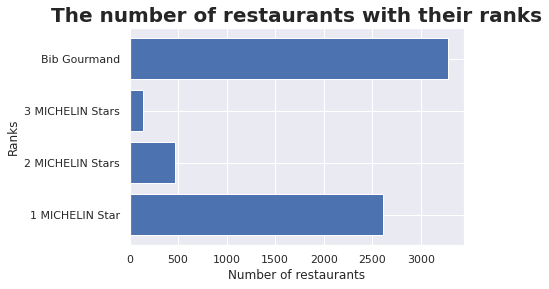

In [20]:
Obj1()

### II. What is the highest/lowest price?

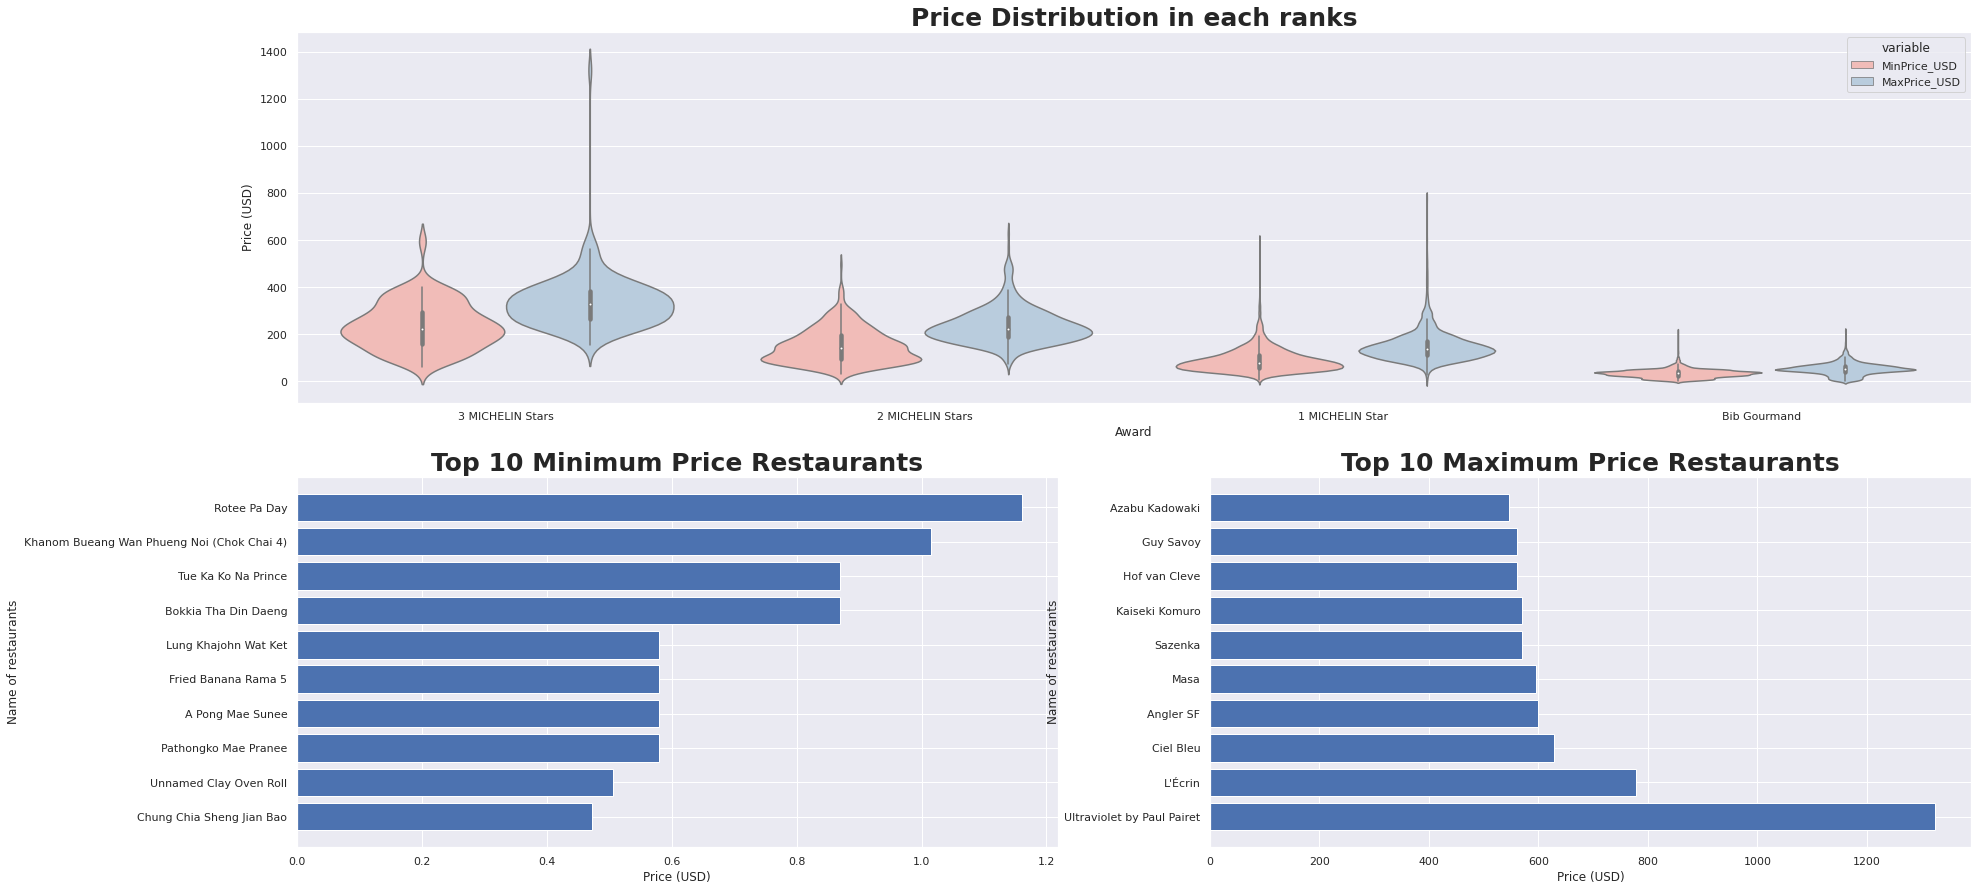

In [21]:
Obj2()

### III. Which country does it have most/lest Michelin restaurants?

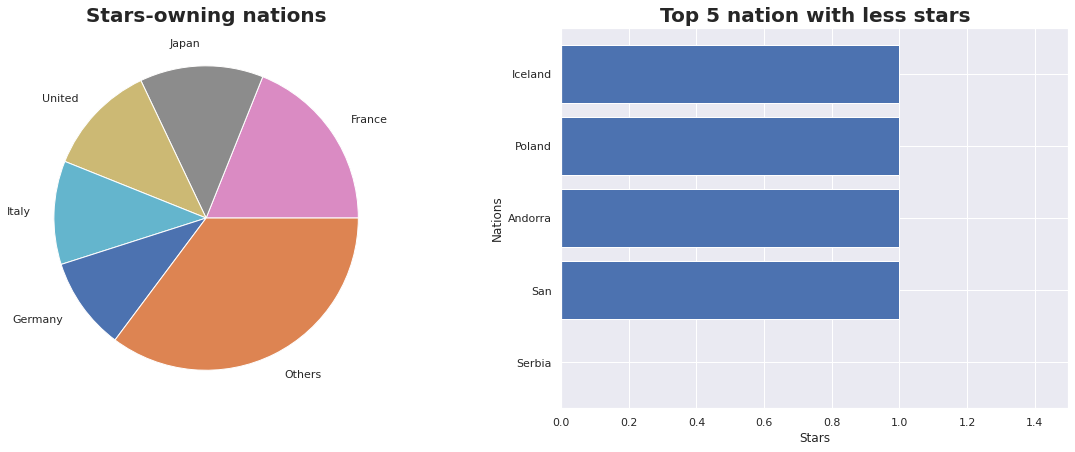

In [22]:
Obj3()

### IV. What is the most beloved cuisine style? (based on Michelin rank)

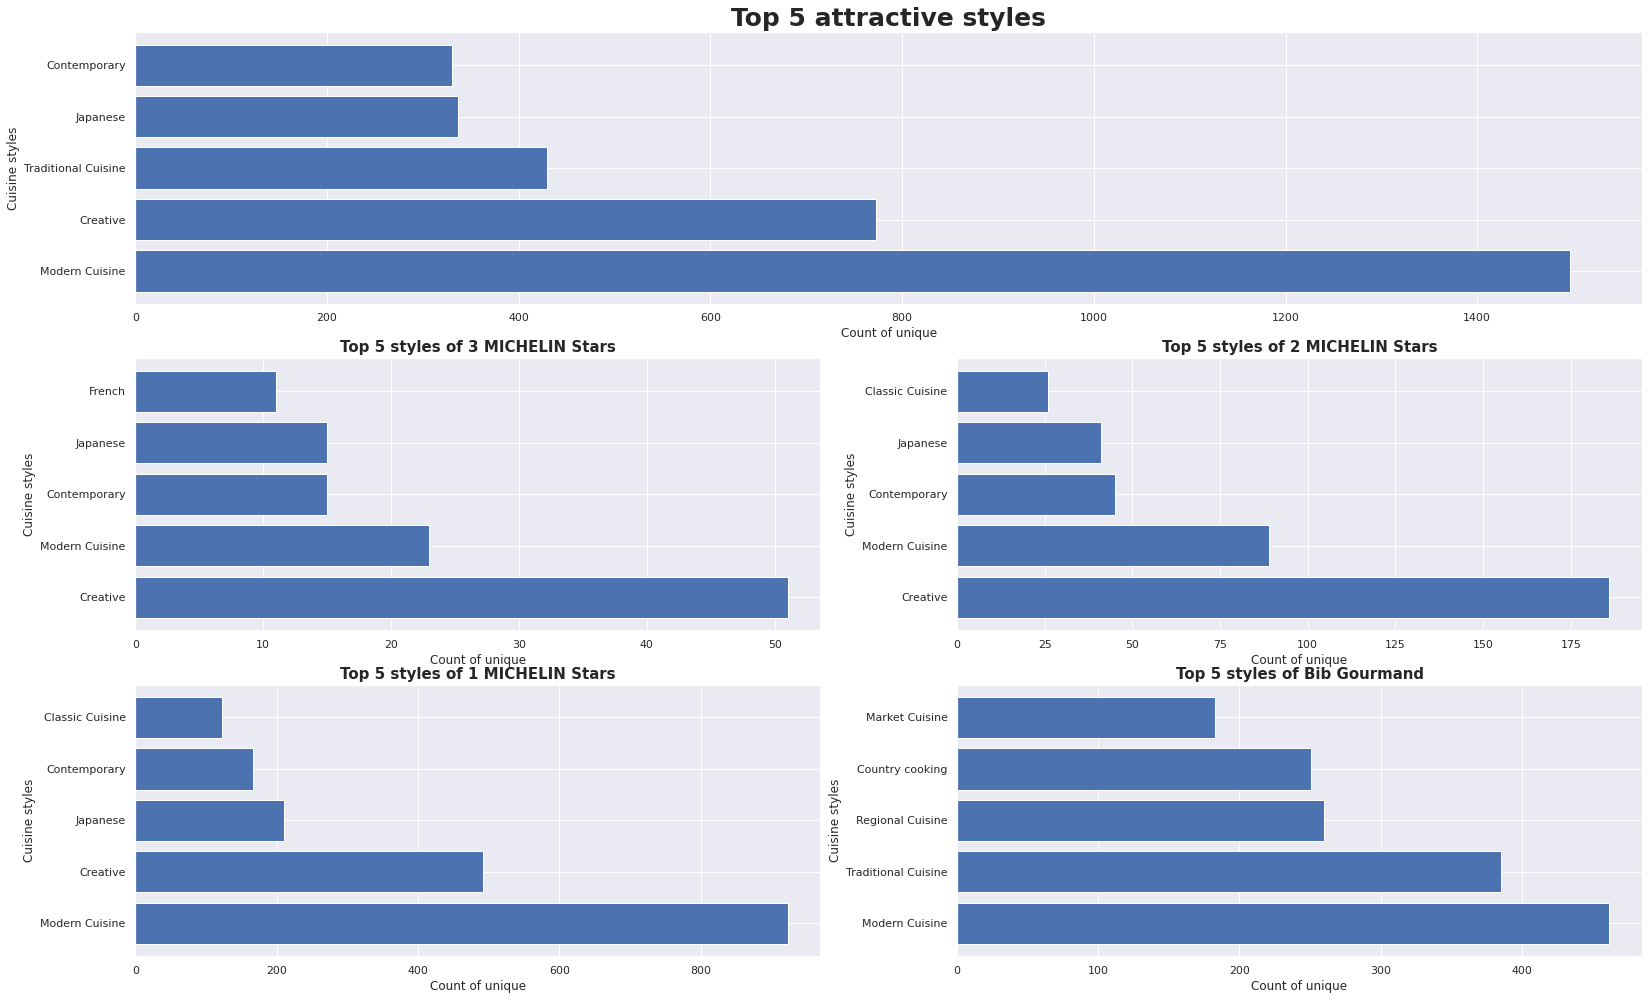

In [23]:
Obj4()